In [1]:
!pip install torch

  Using cached torch-2.10.0-cp310-cp310-win_amd64.whl (113.7 MB)



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
from torch.utils.data import DataLoader
from tqdm import tqdm


In [20]:
LATENT_DIM = 2
BATCH_SIZE = 128
EPOCHS = 10
LR = 1e-3

print(" VAE Signature Generator - KL divergence Classroom")
print(f" Latent Space: {LATENT_DIM}D | Epochs: {EPOCHS}")

transform = transforms.Compose([
    transforms.ToTensor()
])

 VAE Signature Generator - KL divergence Classroom
 Latent Space: 2D | Epochs: 10


In [21]:
train_dataset = torchvision.datasets.MNIST(
    './data', train= True, download=True, transform= transform
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

print(F" Loaded :{len(train_dataset):,} real Signatures (digits 0-9)")

 Loaded :60,000 real Signatures (digits 0-9)


In [24]:
class SignatureVAE(nn.Module):

    def __init__(self, latent_dim =2):

        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.ReLU(),
            nn.Linear(400, latent_dim*2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 28*28),
            nn.Sigmoid()
        )
    
    def reparamaterization(self, mu, logvar):

        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std


    def forward(self, x):

        h = self.encoder(x.view(-1,784))
        mu, logvar = h.chunk(2, dim=1)

        z = self.reparamaterization(mu, logvar)

        recon =  self.decoder(z)
        return recon ,mu ,logvar


def kl_loss(mu, logvar):

    return -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())


print("\n🔍 KL Role: Keeps 2D signature space organized like a normal map!")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SignatureVAE(LATENT_DIM).to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)

losses = {'total': [], 'recon': [], 'kl': []}

for epoch in range(EPOCHS):
    model.train()
    total_loss = recon_loss_total = kl_loss_total = 0

    for batch_idx, (data, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}")):
        data = data.to(device)

        recon, mu , logvar = model(data)

        recon_loss = F.binary_cross_entropy(
            recon.view(-1, 784),
            data.view(-1, 784),
            reduction = 'sum'
        )

        kl_div = kl_loss(mu, logvar)

        loss = recon_loss + kl_div

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += recon_loss.item()
        recon_loss_total += recon_loss.item()
        kl_loss_total += kl_div.item()

        # Epoch Statistics 
        avg_total = total_loss / (batch_idx + 1)
        avg_recon = recon_loss_total / (batch_idx + 1)
        avg_kl = kl_loss_total / (batch_idx + 1)

        losses["total"].append(avg_total)
        losses["recon"].append(avg_recon)
        losses["kl"].append(avg_kl)

    print(f"Epoch {epoch+1:2d}: Total={avg_total:6.1f} (Recon={avg_recon:6.1f} + KL={avg_kl:6.3f})")




🔍 KL Role: Keeps 2D signature space organized like a normal map!


Epoch 1: 100%|██████████| 469/469 [00:07<00:00, 66.47it/s]


Epoch  1: Total=23721.5 (Recon=23721.5 + KL=730.296)


Epoch 2: 100%|██████████| 469/469 [00:08<00:00, 58.34it/s]


Epoch  2: Total=20701.2 (Recon=20701.2 + KL=674.897)


Epoch 3: 100%|██████████| 469/469 [00:08<00:00, 58.08it/s]


Epoch  3: Total=20231.8 (Recon=20231.8 + KL=684.197)


Epoch 4: 100%|██████████| 469/469 [00:07<00:00, 59.97it/s]


Epoch  4: Total=19984.4 (Recon=19984.4 + KL=691.526)


Epoch 5: 100%|██████████| 469/469 [00:08<00:00, 55.58it/s]


Epoch  5: Total=19809.3 (Recon=19809.3 + KL=698.894)


Epoch 6: 100%|██████████| 469/469 [00:08<00:00, 55.56it/s]


Epoch  6: Total=19651.6 (Recon=19651.6 + KL=706.177)


Epoch 7: 100%|██████████| 469/469 [00:08<00:00, 58.02it/s]


Epoch  7: Total=19499.0 (Recon=19499.0 + KL=715.936)


Epoch 8: 100%|██████████| 469/469 [00:08<00:00, 57.33it/s]


Epoch  8: Total=19353.4 (Recon=19353.4 + KL=724.535)


Epoch 9: 100%|██████████| 469/469 [00:08<00:00, 56.38it/s]


Epoch  9: Total=19238.5 (Recon=19238.5 + KL=732.833)


Epoch 10: 100%|██████████| 469/469 [00:08<00:00, 53.51it/s]

Epoch 10: Total=19133.3 (Recon=19133.3 + KL=737.653)



🎨 Generating results...


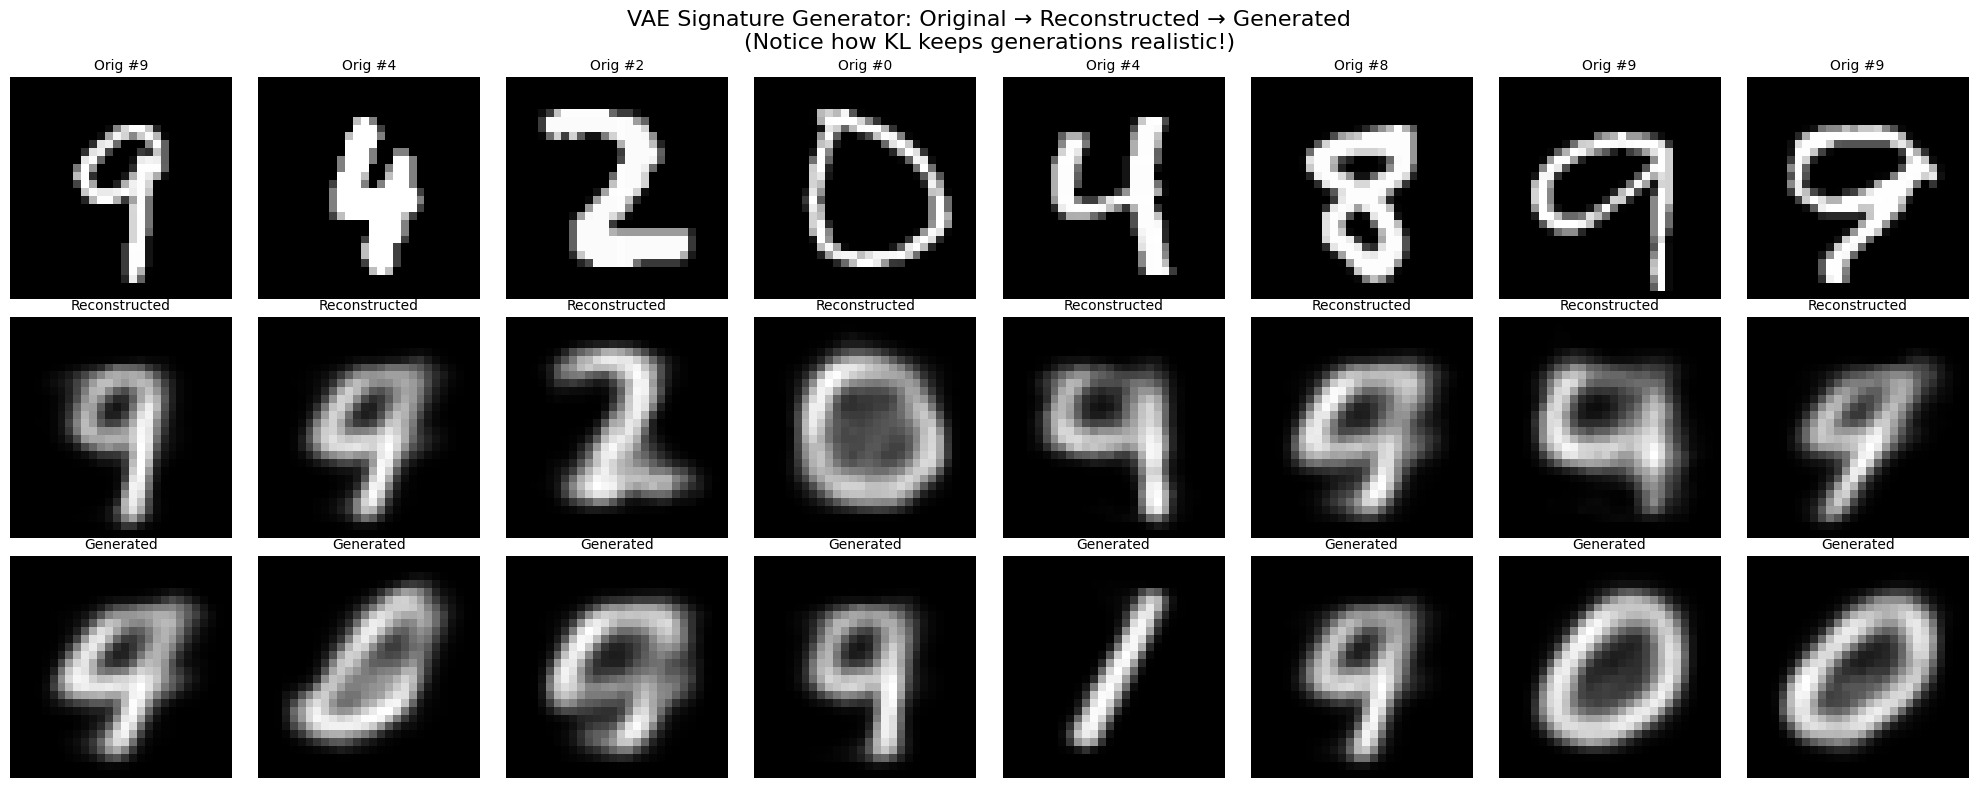

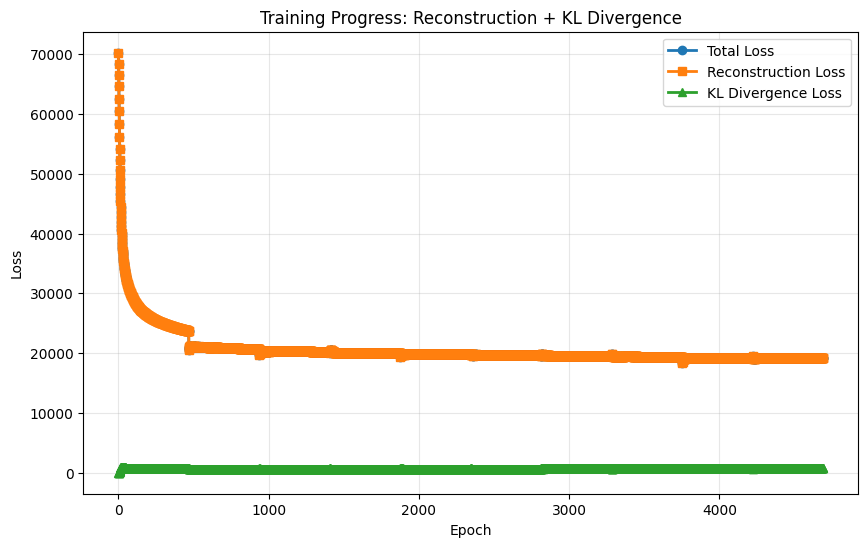


🎓 STUDENT LESSONS:
1️⃣ VAE = Encoder(Compress) + Decoder(Reconstruct) + KL(Organize)
2️⃣ KL Divergence = 'Normal distribution police' in latent space
3️⃣ WITHOUT KL: Generated signatures look blurry/weird
4️⃣ WITH KL: Smooth interpolation, realistic new signatures
5️⃣ Real application: Bank fraud detection, face generation, anomaly detection
✅ DEMO COMPLETE! Ready for classroom discussion.


In [25]:
print("\n🎨 Generating results...")

model.eval()  # Set to evaluation mode
with torch.no_grad():  # No gradients needed
    # Get 8 real signatures
    data, labels = next(iter(train_loader))
    data = data[:8].to(device)
    recon, _, _ = model(data)

    # Generate 8 NEW signatures from pure noise!
    z_noise = torch.randn(8, LATENT_DIM).to(device)
    generated = model.decoder(z_noise)

    # Plot 3x8 grid: Original | Reconstructed | Generated
    fig, axes = plt.subplots(3, 8, figsize=(20, 8))
    fig.suptitle('VAE Signature Generator: Original → Reconstructed → Generated\n(Notice how KL keeps generations realistic!)',
                 fontsize=16, y=0.98)

    for i in range(8):
        # Original signatures
        axes[0, i].imshow(data[i].cpu().view(28, 28), cmap='gray')
        axes[0, i].set_title(f'Orig #{labels[i].item()}', fontsize=10)
        axes[0, i].axis('off')

        # Reconstructed (should match original closely)
        axes[1, i].imshow(recon[i].cpu().view(28, 28), cmap='gray')
        axes[1, i].set_title('Reconstructed', fontsize=10)
        axes[1, i].axis('off')

        # Generated from noise (should look realistic!)
        axes[2, i].imshow(generated[i].cpu().view(28, 28), cmap='gray')
        axes[2, i].set_title('Generated', fontsize=10)
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

# =============================================================================
# 7. LOSS PLOT - Show KL divergence contribution over time
# =============================================================================
plt.figure(figsize=(10, 6))
plt.plot(losses['total'], 'o-', label='Total Loss', linewidth=2)
plt.plot(losses['recon'], 's-', label='Reconstruction Loss', linewidth=2)
plt.plot(losses['kl'], '^-', label='KL Divergence Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress: Reconstruction + KL Divergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# =============================================================================
# 8. KEY LESSONS SUMMARY
# =============================================================================
print("\n" + "="*70)
print("🎓 STUDENT LESSONS:")
print("1️⃣ VAE = Encoder(Compress) + Decoder(Reconstruct) + KL(Organize)")
print("2️⃣ KL Divergence = 'Normal distribution police' in latent space")
print("3️⃣ WITHOUT KL: Generated signatures look blurry/weird")
print("4️⃣ WITH KL: Smooth interpolation, realistic new signatures")
print("5️⃣ Real application: Bank fraud detection, face generation, anomaly detection")
print("="*70)
print("✅ DEMO COMPLETE! Ready for classroom discussion.")